<a href="https://colab.research.google.com/github/berviantoleo/machine-learning-experiment/blob/master/NLP_Text_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

'''
1 - World
2 - Sports
3 - Business
4 - Sci/Tech
'''

data_train = pd.read_csv('https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv', header=None, names=['category','title','description'])
data_train

,category,title,description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [ ]:
category = pd.get_dummies(data_train.category)
data_train_baru = pd.concat([data_train, category], axis=1)
data_train_baru = data_train_baru.drop(columns='category')
data_train_baru

,title,description,1,2,3,4
0,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",0,0,1,0
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,0,0,1,0
2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,0,0,1,0
3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,0,0,1,0
4,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",0,0,1,0
...,...,...,...,...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...,1,0,0,0
119996,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...,0,1,0,0
119997,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...,0,1,0,0
119998,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...,0,1,0,0


In [ ]:
description_latih = data_train_baru['description'].values
label_latih = data_train_baru[[1, 2, 3, 4]].values
label_latih

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split
description_latih, description_validation, label_latih, label_validation = train_test_split(description_latih, label_latih, test_size=0.2)

In [ ]:
data_test = pd.read_csv('https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/test.csv', header=None, names=['category','title','description'])
data_test

,category,title,description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [ ]:
category_test = pd.get_dummies(data_test.category)
data_test_baru = pd.concat([data_test, category_test], axis=1)
data_test_baru = data_test_baru.drop(columns='category')
data_test_baru

,title,description,1,2,3,4
0,Fears for T N pension after talks,Unions representing workers at Turner Newall...,0,0,1,0
1,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",0,0,0,1
2,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,0,0,0,1
3,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,0,0,0,1
4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,0,0,0,1
...,...,...,...,...,...,...
7595,Around the world,Ukrainian presidential candidate Viktor Yushch...,1,0,0,0
7596,Void is filled with Clement,With the supply of attractive pitching options...,0,1,0,0
7597,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,0,1,0,0
7598,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...,0,0,1,0


In [ ]:
description_test = data_test_baru['description'].values
label_test = data_test_baru[[1, 2, 3, 4]].values
label_test

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]], dtype=uint8)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
     
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(description_latih) 
tokenizer.fit_on_texts(description_validation)
tokenizer.fit_on_texts(description_test)
     
sekuens_latih = tokenizer.texts_to_sequences(description_latih)
sekuens_validation = tokenizer.texts_to_sequences(description_validation)
sekuens_test = tokenizer.texts_to_sequences(description_test)

padded_latih = pad_sequences(sekuens_latih) 
padded_validation = pad_sequences(sekuens_validation)
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
     tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.LSTM(64),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(4, activation='softmax')
     ])
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
num_epochs = 15
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('val_accuracy') > 0.9 and logs.get('accuracy') > 0.9):
        print("\nAkurasi telah mencapai > 90%!")
        self.model.stop_training = True

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)

callbacks = myCallback()
history = model.fit(padded_latih, label_latih, batch_size=128, epochs=num_epochs, callbacks=[callbacks, es_callback], validation_data=(padded_validation, label_validation), verbose=2)

Epoch 1/15
750/750 - 115s - loss: 0.5259 - accuracy: 0.8150 - val_loss: 0.3261 - val_accuracy: 0.8926
Epoch 2/15
750/750 - 116s - loss: 0.3326 - accuracy: 0.8976 - val_loss: 0.3181 - val_accuracy: 0.8961
Epoch 3/15
750/750 - 116s - loss: 0.2992 - accuracy: 0.9062 - val_loss: 0.3024 - val_accuracy: 0.8971
Epoch 4/15

Akurasi telah mencapai > 90%!
750/750 - 116s - loss: 0.2755 - accuracy: 0.9142 - val_loss: 0.3159 - val_accuracy: 0.9026


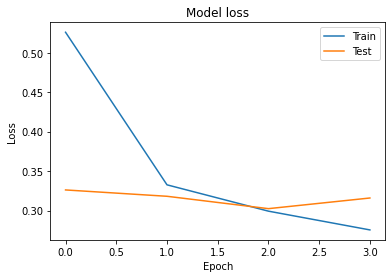

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

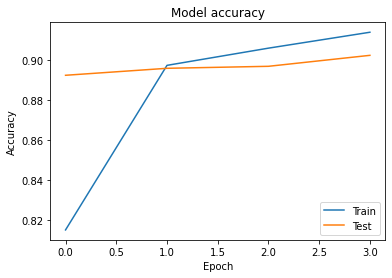

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [ ]:
model.predict(padded_test)

array([[1.1037185e-01, 2.4436435e-04, 8.7051481e-01, 1.8869009e-02],
       [3.3328447e-03, 5.0232557e-06, 1.9362323e-02, 9.7729981e-01],
       [1.4884832e-02, 1.7694398e-04, 8.2478933e-03, 9.7669035e-01],
       ...,
       [1.5860749e-02, 9.8352295e-01, 3.4770853e-04, 2.6844477e-04],
       [7.3415989e-01, 3.7609779e-03, 7.5132415e-02, 1.8694668e-01],
       [2.0467460e-03, 5.1935964e-05, 5.0444561e-01, 4.9345565e-01]],
      dtype=float32)